# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

Start Minute 37:30

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

This is similar to last weeks lesson, only now we can use any kinds of objects, find the approach imspired from here: https://www.pyimagesearch.com/

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

```

And what to do with the return then?

### Create directory and upload urls file into your server

In [8]:
from fastai import *
from fastai.vision import *

Choose an appropriate name for your labeled images. You can run these steps multiple times to grab different labels.

In [2]:
folder = 'black'
file = 'urls_black.txt'

In [3]:
folder = 'teddys'
file = 'urls_teddys.txt'

In [11]:
folder = 'grizzly'
file = 'urls_grizzly.txt'

You will need to run this line once per each category.

In [12]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

Finally, upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.

![uploaded file](images/download_images/upload.png)

## Download images

Now you will need to download you images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename and the destination folder and this function will download and save all images than can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [5]:
classes = ['teddys','grizzly','black']

In [6]:
!pwd


/home/jupyter/tutorials/fastai/course-v3/nbs/dl1


In [14]:
download_images(path/file, dest, max_pics=150)

Error https://bloximages.chicago2.vip.townnews.com/rexburgstandardjournal.com/content/tncms/assets/v3/editorial/e/b2/eb2adf98-834c-5379-912a-ea49f2d204f0/5b5a3f729af08.image.jpg?resize=1200%2C797 'content-length'
Error https://bloximages.chicago2.vip.townnews.com/montanauntamed.com/content/tncms/assets/v3/editorial/8/2c/82cc48dc-22e9-5b09-8280-7e5f74526021/5b9962af29a53.image.jpg?resize=1200%2C800 'content-length'
Error https://3wq24a3fnmyg4dtk8q2jysx2-wpengine.netdna-ssl.com/wp-content/uploads/2017/07/7812135_web1_Grizzlybear55.jpg 'content-length'
Error https://www.californiaacademyofsciences.org/sites/default/files/styles/manual_crop_standard_960x540/public/assets/images/KW_IMAGES_DO_NOT_USE/monarch_specimen_spotlight_2-.jpg?itok=UVzejGd6&c=96724feb906e3160d797b552a6ea6d71 HTTPSConnectionPool(host='www.californiaacademyofsciences.org', port=443): Max retries exceeded with url: /sites/default/files/styles/manual_crop_standard_960x540/public/assets/images/KW_IMAGES_DO_NOT_USE/monarch_

In [15]:
# If you have problems download, try with `max_workers=0` to see exceptions:
download_images(path/file, dest, max_pics=20, max_workers=0)

Then we can remove any images that can't be opened:

In [16]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

teddys


cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/teddys/urls_teddy.txt'
grizzly


cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000142.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000014.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000028.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000096.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000127.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000062.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000032.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000063.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000121.jpg'
cannot ide

cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/black/urls_black.txt'


## View data

In [13]:
np.random.seed(142) ## every time you run this code, you get the same validation set
## same validation set matters t check on hyperparameter tuning
## valid_pct sets aside random 20% of data as a validation set
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [14]:
data.classes ## models shouldnt be here

['black', 'grizzly', 'teddys']

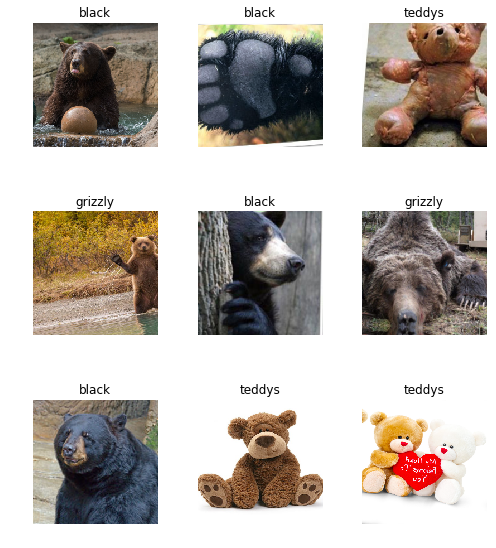

In [19]:
data.show_batch(rows=3, figsize=(7,8))

In [20]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 361, 74)

## Train model

In [16]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [22]:
learn.fit_one_cycle(4)

Total time: 00:50
epoch  train_loss  valid_loss  error_rate
1      0.998873    0.170081    0.054054    (00:12)
2      0.573072    0.178966    0.040541    (00:13)
3      0.397413    0.141504    0.040541    (00:11)
4      0.304904    0.132336    0.040541    (00:11)



In [23]:
learn.save('stage-1')

In [24]:
learn.unfreeze()

In [25]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


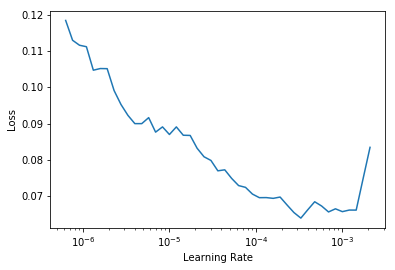

In [26]:
learn.recorder.plot()

Learning Rate: "look for strongest downward slope, that goes on for a while'

In [27]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4)) ## top vs bottom learning rate

Total time: 00:27
epoch  train_loss  valid_loss  error_rate
1      0.074171    0.161673    0.040541    (00:14)
2      0.056724    0.187978    0.040541    (00:13)



In [28]:
learn.save('stage-2')

In [ ]:
3e-3 learning rate good experimental default, then go down with dividing by 10
learn.fit_one_cycle(4, 3e-3)
...

## Interpretation

In [17]:
learn.load('stage-2')

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

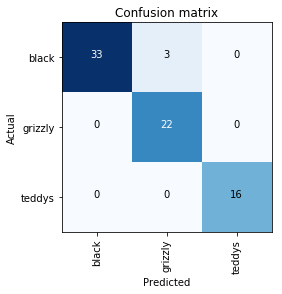

In [31]:
interp.plot_confusion_matrix()

Good result

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `FileDeleter` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

First we need to get the file paths from our top_losses. Here's a handy function that pulls out all our top_losses:

In [19]:
from fastai.widgets import *

losses,idxs = interp.top_losses() ## 1 losses, indexes into dataset. 
##if nothing passed, give back data set sorted with highest first

## here we take out noise from validation set, should also happen for test and training set
top_loss_paths = data.valid_ds.x[idxs] ## gives files names path of top losses: 
## confident but wrong about, not confident but correct

Now we can pass in these paths to our widget.

In [20]:
## same results as top losses. Things that should not be in dataset --> delete button
fd = FileDeleter(file_paths=top_loss_paths) 

Button(button_style='primary', description='Confirm', style=ButtonStyle())

In [34]:
## You can build tools inside a ipython notebook easily: https://ipywidgets.readthedocs.io/en/stable/
## since inside a notebook, not really productionise
## for Production, build a production webapp, see below
??FileDeleter

Flag photos for deletion by clicking 'Delete'. Then click 'Confirm' to delete flagged photos and keep the rest in that row. The `File_Deleter` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses`.

## Putting your model in production

After clean up, rerun.

Note, main issue with noisy data is if sth is not randomly but biassed noisy.



In [35]:
data.classes ## what were the classes you trained for

['black', 'grizzly', 'teddys']

On Production, typically you want a CPU because you need to do many things at a time. You have a _trained_ model and use it for inference.

https://blogs.nvidia.com/blog/2016/08/22/difference-deep-learning-training-inference-ai/

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [ ]:
# fastai.defaults.device = torch.device('cpu')

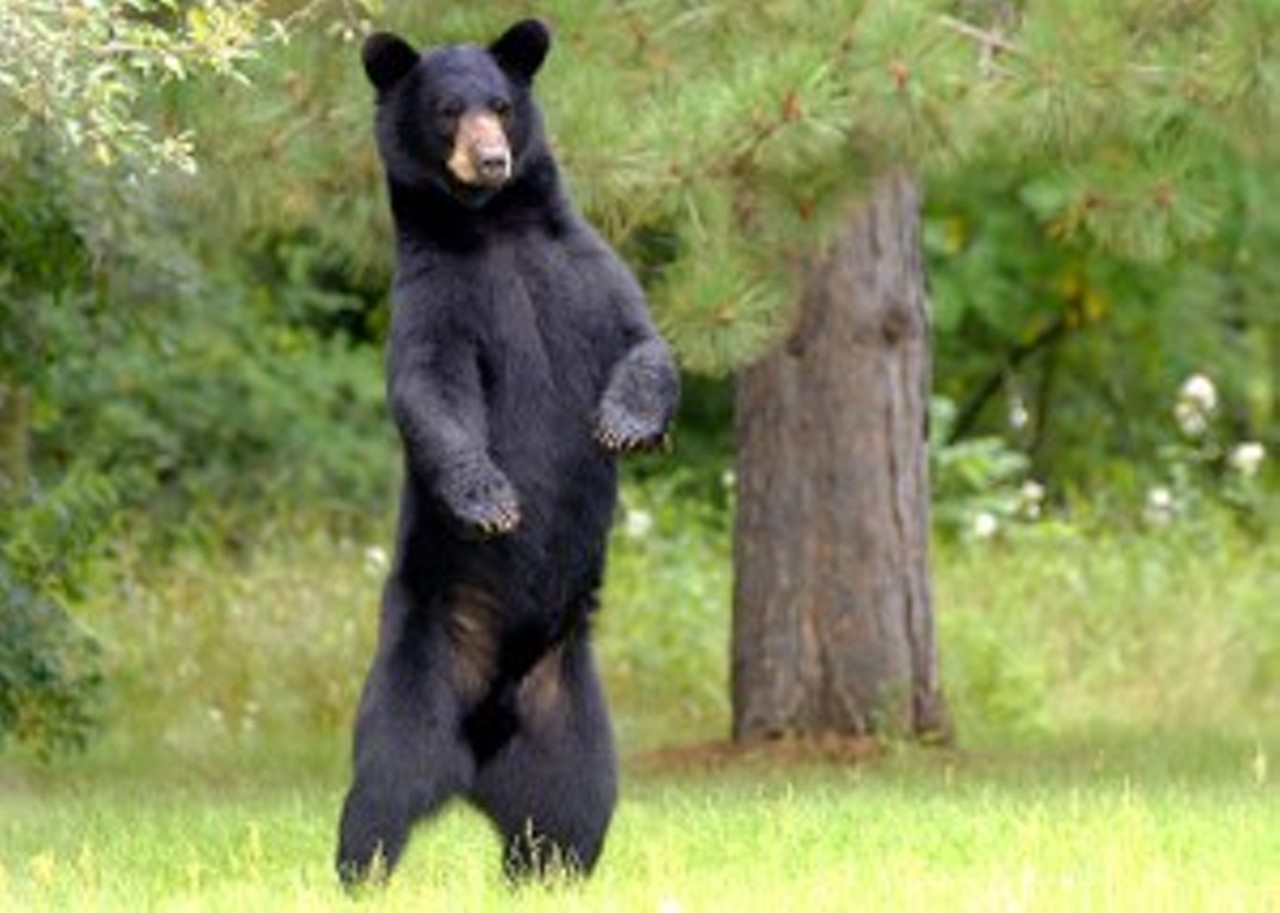

In [36]:
img = open_image(path/'black'/'00000021.jpg')
img

In [37]:
## you do this once, when your webapp starts up
classes = ['black', 'grizzly', 'teddys']
## special databunch: one image at a time
## same 'stuff' as used before
## data2 just does same as before ? to do inference
data2 = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load('stage-2')

In [38]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

'black'

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code): 

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

This is a python3 library. Find in the forum more comments how to use frameworks for this.

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are (too high or low)
  - Learning rate
  - Number of epochs
  
Note: no other parameters!

### Learning rate (LR) too high

In [22]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [23]:
learn.fit_one_cycle(1, max_lr=0.5) ## try out learning rate too high. 0.003 is normal

## validation loss gets high. Usually its below 0.1 --> make the learning rate higher, no matter how many epochs
## 

Total time: 00:11
epoch  train_loss  valid_loss  error_rate      
1      17.591330   135115664.000000  0.513514    (00:11)



### Learning rate (LR) too low

In [24]:
learn = create_cnn(data, models.resnet34, metrics=error_rate) 
## error rate gets better very very slowly

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [28]:
learn.fit_one_cycle(5, max_lr=1e-5) # .0001 learning rate TOO SMALL

traing loss higher than validation less: learning rate of number of epcohs too low: you trained not enough

SyntaxError: invalid syntax (<ipython-input-28-364db35023f4>, line 3)

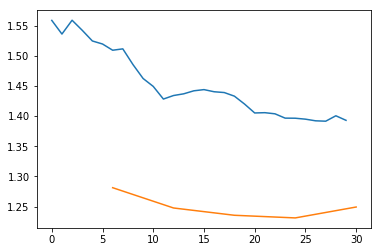

In [26]:
## 1.320978    0.978108

learn.recorder.plot_losses()

As well as taking a really long time, it's getting _too many looks at each image_, so may overfit.

### Too few epochs

In [29]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

## similar like low learning rate

In [30]:
learn.fit_one_cycle(1)

Total time: 00:12
epoch  train_loss  valid_loss  error_rate
1      0.592313    0.208904    0.040541    (00:12)



### Too many epochs

Overfitting, if you train too long. Really overfitting with Deep Learning is actually hard to do.

It learns about your _particular_ teddy bears

In [31]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [32]:
learn = create_cnn(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [33]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))
## 'loss improves for a while, then goes south'
## COMMON MISTAKE Overfitting = training loss lower than validation loss
## CORRECT: train loss lower than validayion less is a sign the model is well trained
## CORRECT: overfitting means the error is getting worse

Total time: 06:37
epoch  train_loss  valid_loss  error_rate
1      1.007828    1.248968    0.600509    (00:15)
2      0.935789    1.161027    0.549618    (00:09)
3      0.887537    1.055433    0.503817    (00:09)
4      0.811222    0.947919    0.430025    (00:09)
5      0.749314    0.836203    0.338422    (00:09)
6      0.680031    0.725902    0.259542    (00:09)
7      0.619355    0.624036    0.180662    (00:09)
8      0.584428    0.529530    0.129771    (00:09)
9      0.525531    0.455166    0.109415    (00:09)
10     0.478958    0.389975    0.096692    (00:09)
11     0.439920    0.341064    0.083969    (00:09)
12     0.402280    0.296526    0.081425    (00:09)
13     0.365701    0.272216    0.078880    (00:09)
14     0.334157    0.254161    0.076336    (00:09)
15     0.307347    0.241176    0.063613    (00:09)
16     0.283513    0.230172    0.061069    (00:09)
17     0.263027    0.228166    0.055980    (00:09)
18     0.244071    0.217175    0.055980    (00:09)
19     0.233921    0.2